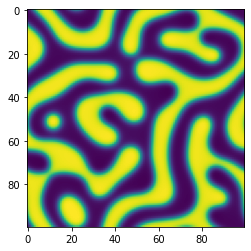

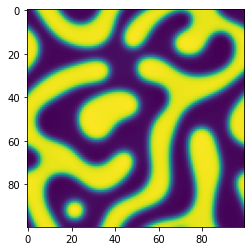

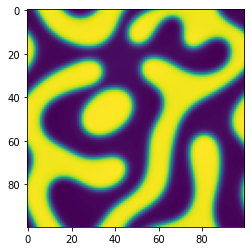

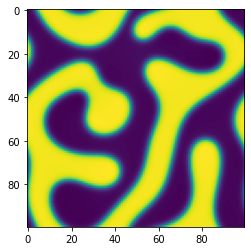

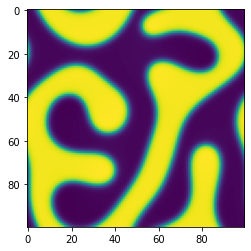

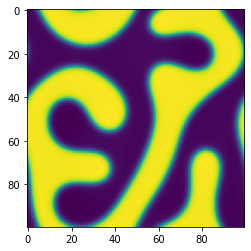

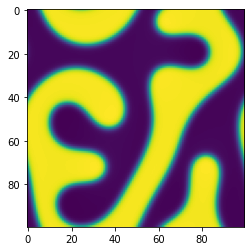

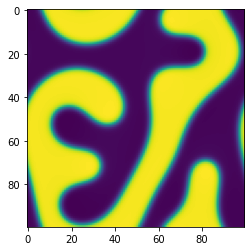

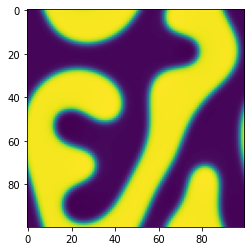

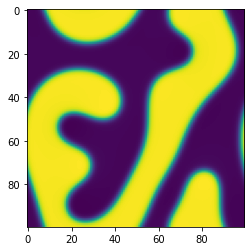

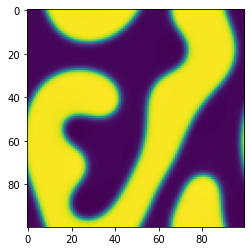

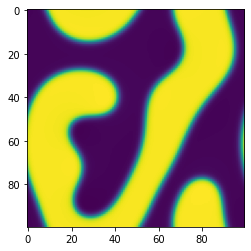

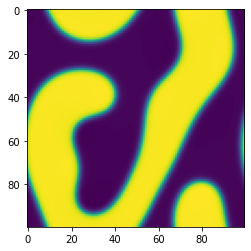

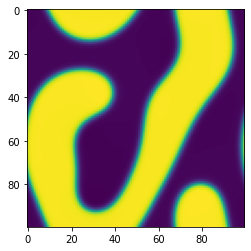

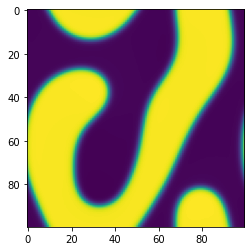

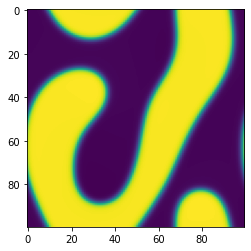

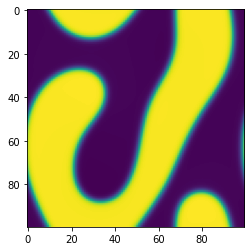

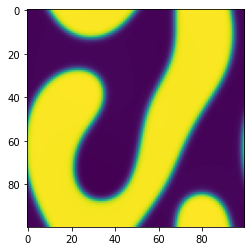

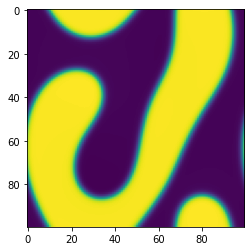

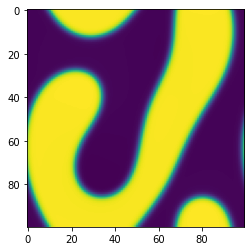

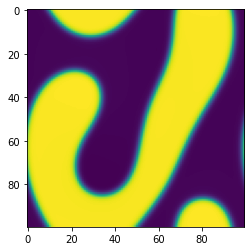

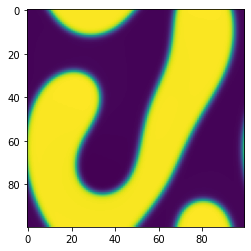

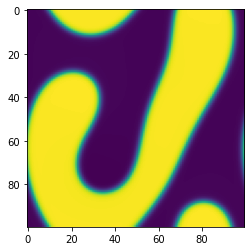

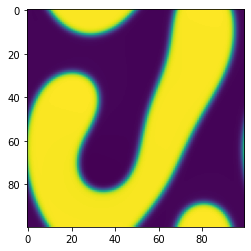

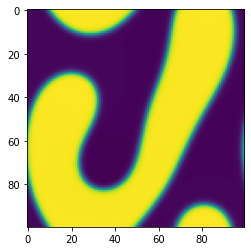

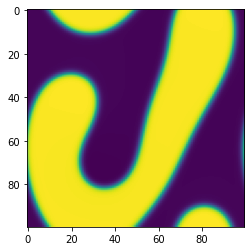

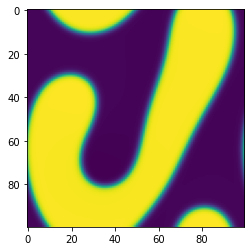

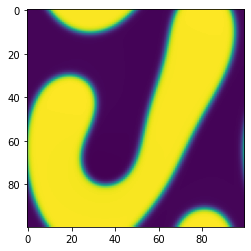

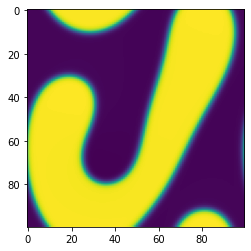

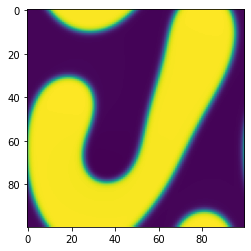

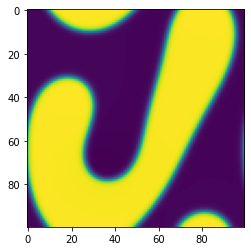

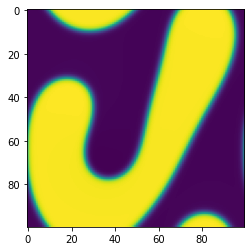

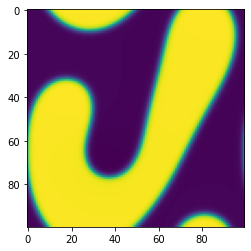

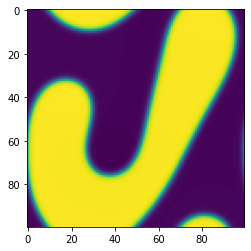

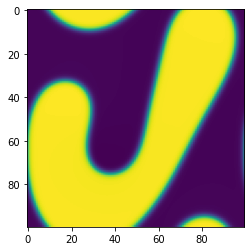

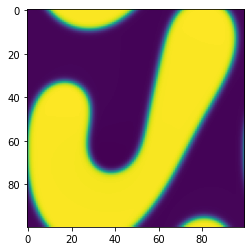

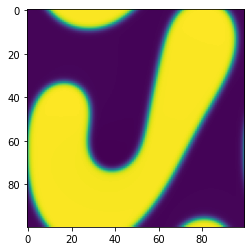

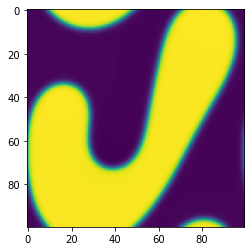

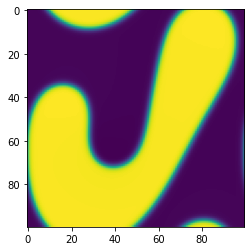

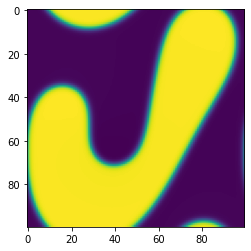

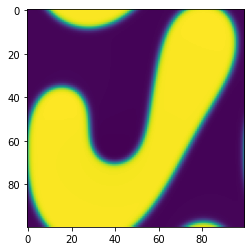

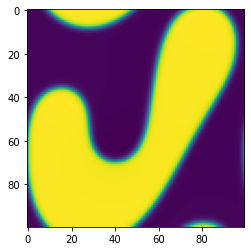

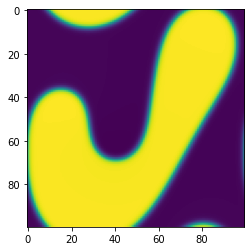

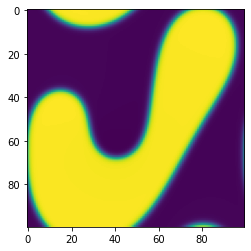

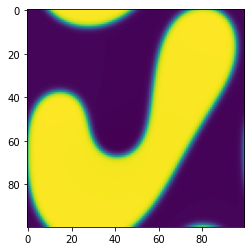

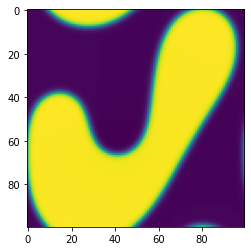

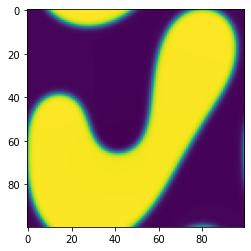

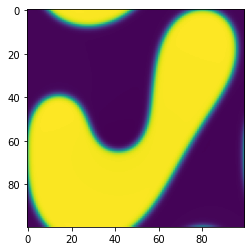

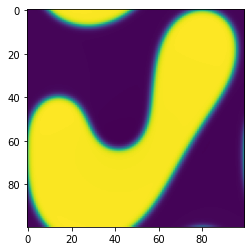

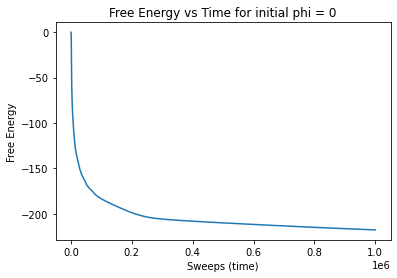

It took: 141.69538850386937 minutes to run


In [1]:
import matplotlib
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import time
import scipy as sp
from scipy import ndimage

start_time=time.time()


#Number of Montecarlo sweeps for calculation
sweeps = 1000000
snapshots=50

N=100

dt=1
dx=1
M=0.1
a=0.1
k=0.1

phi0=0

def initialphi(N):   
    
    return (np.full((N,N),phi0) + 0.01*np.random.randint(-10,10,size=(N,N)))

def nextPhi(phi):
    
    mu= chemPot(phi)
    
    phi += ((M*dt)/(dx**2))*(np.roll(mu,1, axis=0) + np.roll(mu,-1, axis=0) + 
                             np.roll(mu,1, axis=1) + np.roll(mu,-1, axis=1)-4*mu)    
    
    return phi 
            
def chemPot(phi):
    
    return np.copy(-a*phi + a*(phi**3) - (k/(dx**2))*(np.roll(phi,1,axis=0) + np.roll(phi, -1 , axis=0) 
                                                      + np.roll(phi,1, axis=1) + np.roll(phi, -1, axis=1)-4*phi)) 

def energy(phi):
     
    f = np.copy(-(a/2)*(phi**2) + (a/4)*(phi**4) + (k/2)*(((np.roll(phi,-1,axis=0)-np.roll(phi,1,axis=0))/(2*dx))**2 
                                                           + ((np.roll(phi,-1,axis=1) - np.roll(phi,1,axis=1))/(2*dx))**2))  
    
    return np.sum(f) 

phi = initialphi(N)

FreeEnergy=np.zeros(sweeps)

counter=0
for i in range(sweeps):         
    
    nextPhi(phi)
    FreeEnergy[i]=energy(phi)
    counter+=1
    if counter == int(sweeps/snapshots):
        plt.cla()
        im=plt.imshow(phi,animated=True)
        plt.draw()
        plt.pause(0.0001)
        counter=0


data=np.vstack((np.arange(sweeps),FreeEnergy)).T
cahndataphi0=pd.DataFrame(data)
cahndataphi0.to_csv('cahndataphi0.csv',index=False)

plt.plot(np.arange(sweeps),FreeEnergy)
plt.title("Free Energy vs Time for initial phi = 0")
plt.xlabel("Sweeps (time)");
plt.ylabel("Free Energy");         
plt.show()

print("It took: "+str((time.time()-start_time)/60)+" minutes to run")